## Load dataset

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
%cd /content/drive/MyDrive/Problem/BigMart_Sale_Prediction

/content/drive/MyDrive/Problem/BigMart_Sale_Prediction


In [74]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Dataset/BigMartSales Prediction.zip","r") as zip_ref:
    zip_ref.extractall("Dataset")

In [75]:
import os
path_data = "/content/drive/MyDrive/Problem/BigMart_Sale_Prediction/Dataset/BigMartSales Prediction/"
checkPath = os.path.isdir(path_data)
checkFileTrain = os.path.isfile(path_data + "Train.csv")
checkFileTest = os.path.isfile(path_data + "Test.csv")
print("The path and file are valid or not :", checkPath, checkFileTrain, checkFileTest)

The path and file are valid or not : True True True


## Read data

In [76]:
import pandas as pd
train = pd.read_csv(path_data + "Train.csv")
test = pd.read_csv(path_data + "Test.csv")

print(train.shape, test.shape)
print(train.index)
print(train.columns)

(8523, 12) (5681, 11)
RangeIndex(start=0, stop=8523, step=1)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [77]:
display(train.head(5))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Analysis

### Kiểm tra bất thường của dữ liệu định tính (có đồng nhất hay không)

In [78]:
train.describe(include= np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [79]:
# Kiem tra bat thuong tren tap train
import numpy as np
print(np.unique(train["Item_Fat_Content"]))
print(np.unique(train["Item_Type"]))
print(train["Outlet_Size"].unique())
print(np.unique(train["Outlet_Location_Type"]))
print(np.unique(train["Outlet_Type"]))

['LF' 'Low Fat' 'Regular' 'low fat' 'reg']
['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 2' 'Tier 3']
['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']


In [80]:
# Kiem tra bat thuong tren test
print(np.unique(test["Item_Fat_Content"]))
print(np.unique(test["Item_Type"]))
print(test["Outlet_Size"].unique())
print(np.unique(test["Outlet_Location_Type"]))
print(np.unique(test["Outlet_Type"]))

['LF' 'Low Fat' 'Regular' 'low fat' 'reg']
['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']
['Medium' nan 'Small' 'High']
['Tier 1' 'Tier 2' 'Tier 3']
['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']


In [81]:
# Item_Fat_Content co du lieu bat thuong
s = train["Item_Fat_Content"].value_counts()
s

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [82]:
# Xu li bat thuong cua Item_Fat_Content

train.Item_Fat_Content = train.Item_Fat_Content.str.replace('low fat', 'Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('LF', 'Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('reg', 'Regular')

test.Item_Fat_Content = test.Item_Fat_Content.str.replace('low fat', 'Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('LF', 'Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('reg', 'Regular')

In [83]:
tr = train["Item_Fat_Content"].value_counts()
print(tr)
ts = test["Item_Fat_Content"].value_counts()
print(ts)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


### Kiểm tra bất thường của dữ liệu định lượng
IQR = Q3(75%) - Q1(25%)  
ConfidentRange = (Q1(25%) - 1.5*IQR, Q3(75%) - 1.5*IQR)

In [84]:
df_des = train.describe()
df_des

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [85]:
# Kiem tra bat thuong của Item_Weight:
IQR            = df_des.loc['75%', 'Item_Weight'] - df_des.loc['25%', 'Item_Weight']
ConfidentRange = (df_des.loc['25%', 'Item_Weight'] - 1.5*IQR , df_des.loc['75%', 'Item_Weight'] + 1.5*IQR)

check_anomaly  = df_des.loc['min', 'Item_Weight'] < ConfidentRange[0] or df_des.loc['max', 'Item_Weight'] > ConfidentRange[1]
print(f'Feature Item_Weight need to process to overcome anomaly: {check_anomaly}')

# Kiem tra bat thuong cua Item_Visibility
IQR            = df_des.loc['75%', 'Item_Visibility'] - df_des.loc['25%', 'Item_Visibility']
ConfidentRange = (df_des.loc['25%', 'Item_Visibility'] - 1.5*IQR , df_des.loc['75%', 'Item_Visibility'] + 1.5*IQR)

check_anomaly  = df_des.loc['min', 'Item_Visibility'] < ConfidentRange[0] or df_des.loc['max', 'Item_Visibility'] > ConfidentRange[1]
print(f'Feature Item_Visibility need to process to overcome anomaly: {check_anomaly}')

# Kiem tra bat thuong của Item_MRP:
IQR            = df_des.loc['75%', 'Item_MRP'] - df_des.loc['25%', 'Item_MRP']
ConfidentRange = (df_des.loc['25%', 'Item_MRP'] - 1.5*IQR , df_des.loc['75%', 'Item_MRP'] + 1.5*IQR)

check_anomaly  = df_des.loc['min', 'Item_MRP'] < ConfidentRange[0] or df_des.loc['max', 'Item_MRP'] > ConfidentRange[1]
print(f'Feature Item_MRP need to process to overcome anomaly: {check_anomaly}')

# Kiem tra bat thuong của Outlet_Establishment_Year:
IQR            = df_des.loc['75%', 'Outlet_Establishment_Year'] - df_des.loc['25%', 'Outlet_Establishment_Year']
ConfidentRange = (df_des.loc['25%', 'Outlet_Establishment_Year'] - 1.5*IQR , df_des.loc['75%', 'Outlet_Establishment_Year'] + 1.5*IQR)

check_anomaly  = df_des.loc['min', 'Outlet_Establishment_Year'] < ConfidentRange[0] or df_des.loc['max', 'Outlet_Establishment_Year'] > ConfidentRange[1]
print(f'Feature Outlet_Establishment_Year need to process to overcome anomaly: {check_anomaly}')

Feature Item_Weight need to process to overcome anomaly: False
Feature Item_Visibility need to process to overcome anomaly: True
Feature Item_MRP need to process to overcome anomaly: False
Feature Outlet_Establishment_Year need to process to overcome anomaly: False


### Kiểm tra dữ liệu null, NaN

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [88]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [89]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [90]:
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode().iloc[0])

test.Item_Weight = test.Item_Weight.fillna(test.Item_Weight.mean())
test.Outlet_Size = test.Outlet_Size.fillna(test.Outlet_Size.mode().iloc[0])

Điền giá trị mode cho Outlet_Size chưa được tối ưu do số lượng thiếu gần bằng với mode

In [ ]:
print(train.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
print(test.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


## Data visualization

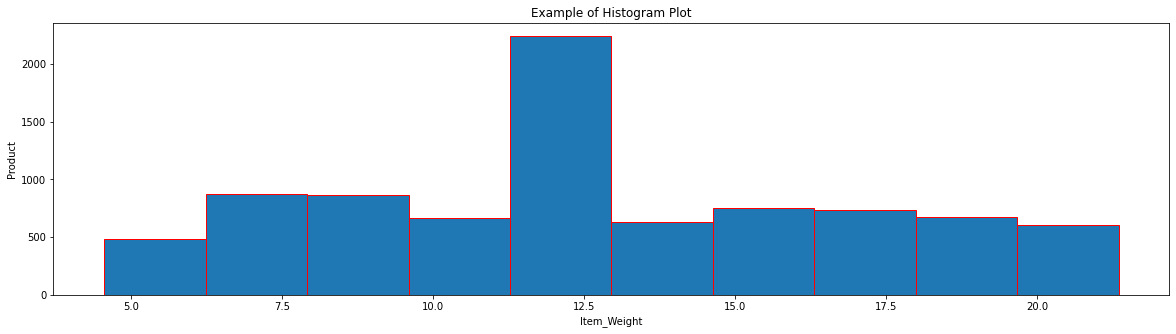

In [91]:
import matplotlib.pyplot as plt
# Plot the distribution of numpy data
train.Item_Weight.plot(kind='hist', edgecolor='red', figsize=(20,5))
 
# Add axis labels
plt.xlabel("Item_Weight")
plt.ylabel("Product")
plt.title("Example of Histogram Plot")
 
plt.show()

<Figure size 1440x360 with 0 Axes>

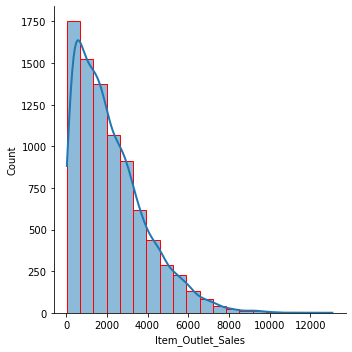

In [140]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.displot(train["Item_Outlet_Sales"], kind= 'hist', bins= 20, kde = True, edgecolor='red', line_kws={'lw':2})

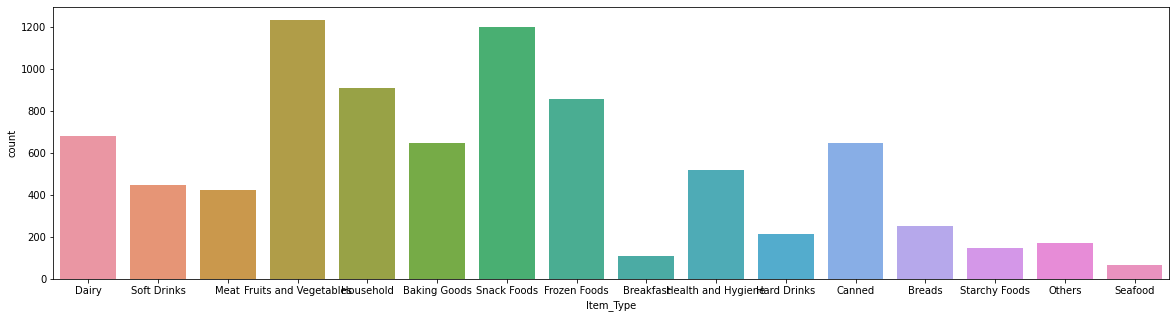

In [142]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.countplot(x='Item_Type',data=train)

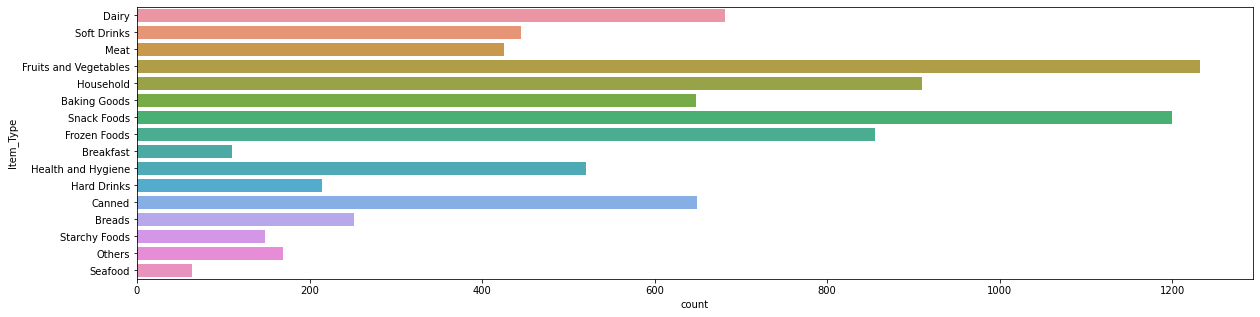

In [143]:
plt.figure(figsize=(20,5))
sns.countplot(y='Item_Type',data=train)

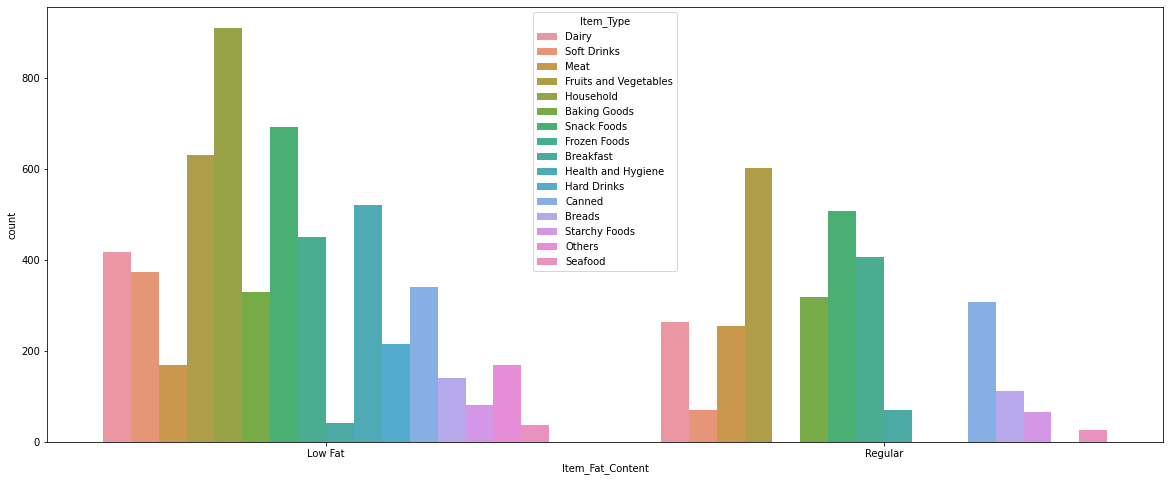

In [144]:
import seaborn as sns
plt.figure(figsize=(20,8))

sns.countplot(x="Item_Fat_Content",hue="Item_Type",data=train)

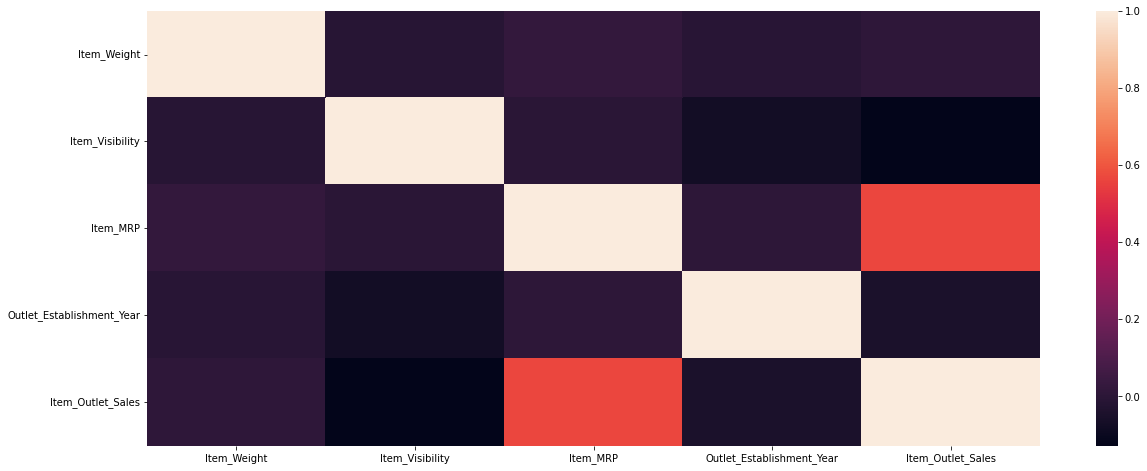

In [145]:
plt.figure(figsize=(20,8))
sns.heatmap(train.corr(),)

## Prediction

In [214]:
x_train = train[["Item_Weight", "Item_MRP", "Outlet_Establishment_Year"]]
x_test = test[["Item_Weight", "Item_MRP", "Outlet_Establishment_Year"]]
y_train = train["Item_Outlet_Sales"]

In [215]:
y_train[:5]

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [216]:
display(x_train.head())

,Item_Weight,Item_MRP,Outlet_Establishment_Year
0,9.30,249.8092,1999
1,5.92,48.2692,2009
2,17.50,141.6180,1999
3,19.20,182.0950,1998
4,8.93,53.8614,1987


In [334]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

In [335]:
df_pred = pd.DataFrame(train["Item_Outlet_Sales"].copy())
df_pred["Item_Outlet_Sales_Predict"] = y_pred
df_pred.head(10)

,Item_Outlet_Sales,Item_Outlet_Sales_Predict
0,3735.1380,2495.862267
1,443.4228,811.388267
2,2097.2700,1400.843200
3,732.3800,1959.227467
4,994.7052,733.711600
5,556.6088,472.274133
6,343.5528,473.383800
7,4022.7636,2607.050867
8,1076.5986,1475.412800
9,4710.5350,3898.924800


In [336]:
from sklearn import metrics
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted) #The mean of the absolute value of the errors
    mse = metrics.mean_squared_error(true, predicted) #The mean of the squared errors
    rmse = np.sqrt(mse) #The square root of the MSE
    r2_square = metrics.r2_score(true, predicted)
    print('MAE: '+ str(mae))
    print('MSE: {}'.format(mse))
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [337]:
y_test = np.array(train["Item_Outlet_Sales"])
print_evaluate(y_test, y_pred)

MAE: 801.4344407915835
MSE: 1266997.3792591528
RMSE: 1125.6097810783065
R2 Square 0.5648747503187056
